In [1]:
import collections
import sympy as sp
import sympy_support.spv_utils as spv
import sympy_support.sv_utils as sv
import matplotlib.pyplot as plt
import sympy.plotting as splt
import IPython.display as ipd
from IPython.utils.text import columnize

from sympy.vector import CoordSys3D

# spv.init_vprinting()
%matplotlib inline

In [2]:
def directory(obj):
    return [
        str for str in dir(obj) if callable(getattr(obj, str)) & ~str.startswith("_")
    ]

In [3]:
print(columnize(directory(ipd)))

Audio          JSON               Video               display_markdown      
Code           Javascript         VimeoVideo          display_pdf           
DisplayHandle  Latex              YouTubeVideo        display_png           
DisplayObject  Markdown           clear_output        display_pretty        
FileLink       Math               display             display_svg           
FileLinks      Pretty             display_html        publish_display_data  
GeoJSON        ProgressBar        display_javascript  set_matplotlib_close  
HTML           SVG                display_jpeg        set_matplotlib_formats
IFrame         ScribdDocument     display_json        update_display        
Image          TextDisplayObject  display_latex     



In [4]:
print(columnize(dir(sp.S)))

Catalan           Naturals            __dir__            __ne__             
ComplexInfinity   Naturals0           __doc__            __new__            
Complexes         NegativeInfinity    __eq__             __reduce__         
EmptySequence     NegativeOne         __format__         __reduce_ex__      
EmptySet          One                 __ge__             __repr__           
EulerGamma        Pi                  __getattr__        __setattr__        
Exp1              Rationals           __getattribute__   __sizeof__         
GoldenRatio       Reals               __gt__             __slots__          
Half              TribonacciConstant  __hash__           __str__            
IdentityFunction  UniversalSet        __init__           __subclasshook__   
ImaginaryUnit     Zero                __init_subclass__  _classes_to_install
Infinity          __call__            __le__             false              
Integers          __class__           __lt__             register           

# Definitions and Identities

The notation $ [ \dots ]_i $ means the $i$ th component of the bracketed vector.

## Einstein Summation Convention

$$
    a_i b_i \equiv \sum_{i \in \{1..3\}} a_i b_i \quad \textrm{$i$ is dummy index}
$$

### Brackets in Einstein Convention

What are the indices in the expression:

#TODO This needs a proof that the indices work as specified

#FIXME Do not understand it

$$a_{i j} \left ( b_i + c_j + d_i   \right )$$

1. Combine terms outside with those inside parentheses separately:
    1. $a_{ij}, b_i$ : $i=2, j=1$
    1. $a_{ij}, c_j$ : $i=1, j=2$
    1. $a_{ij}, d_k$ : $i=1, j=1, k=1$
1. From each of the combined terms use the largest counts of each index as the final count of the overall term $$i:2, j:2, k:1$$
1. In $a_{i j} \left ( b_i + c_j + d_k   \right )$ $i$ and $j$ are dummy 
indices and k is free

### Non-identities

\begin{align*} 
    a_{ij} (x_i + y_j) &\ne a_{ij} x_i + a_{ij}y_j \\
    a_{ij} x_i y_j &\ne a_{ij} x_j y_i \\
    (a_{ij} + a_{ji} ) x_i y_j &\ne 2 a_{ij} x_i y_j \\
\end{align*}

### Identities

\begin{align*} 
    a_{ij} (x_j + y_j) &\equiv a_{ij} x_j + a_{ij}y_j \\
    a_{ij} x_i y_j &\equiv a_{ij} y_j x_i \\
    a_{ij} x_i y_j &\equiv a_{ji} y_i x_j \\
\end{align*}

### Further ESC notation

![](./images/Tensor3.png)
![](./images/Tensor4.png)


## Vector Definitions

\begin{align*}
    \mathbf{a} \cdot \mathbf{b} &= 
    \Vert \mathbf{a} \Vert \Vert \mathbf{b} \Vert \cos(\theta)
    \qquad \text{ where $\theta$ is the angle between $ \mathbf{a}$ and $\mathbf{b}$} \\
    \mathbf{a} \cdot \mathbf{b} &= \mathbf{b} \cdot \mathbf{a} \\
    
    \mathbf{a} \times \mathbf{b} &= 
        |\mathbf{a}| |\mathbf{b}| \sin(\theta)\mathbf{ \hat n} 
            \qquad   |\mathbf{ \hat n} | = 1 
                \land \mathbf{ \hat n} \perp \mathbf{a} 
                \land \mathbf{ \hat n} \perp \mathbf{b} 
                \textrm{ Right Hand Rule} \\

    \mathbf{a} \times \mathbf{b} &\neq \mathbf{b} \times \mathbf{a} \\
    \mathbf{a} \times \mathbf{b} &= - \mathbf{b} \times \mathbf{a} \\
    \mathbf{a} + \mathbf{b} &= 
        \mathbf{b} + \mathbf{a} \\
    (\mathbf{a} + \mathbf{b}) + \mathbf{c} &= 
        \mathbf{a} + (\mathbf{b} + \mathbf{c}) \\ \\
    \alpha (\mathbf{a} + \mathbf{b}) &= 
        \alpha \mathbf{a} + \alpha \mathbf{b}\\
    \mathbf{a} \cdot (\mathbf{b} + \mathbf{c}) &= 
        \mathbf{a} \cdot \mathbf{b} + \mathbf{a} \cdot \mathbf{c}\\
    \mathbf{a} \times (\mathbf{b} + \mathbf{c}) &= 
        \mathbf{a} \times \mathbf{b} +
        \mathbf{a} \times \mathbf{b} \\
    \mathbf{a} \cdot (\mathbf{b} \times \mathbf{c}) &= 
    \mathbf{c} \cdot (\mathbf{a} \times \mathbf{b})= 
    \mathbf{b} \cdot (\mathbf{c} \times \mathbf{a}) \\
    \mathbf{a} \times (\mathbf{b} \times \mathbf{c}) &= 
    \mathbf{b}(\mathbf{a}
        \cdot \mathbf{c}) - \mathbf{c}(\mathbf{a} \cdot \mathbf{b}) \\
    [\mathbf{a} \times \mathbf{b}]_i &= \epsilon_{ijk} a_j b_k 
    \\\\
\end{align*}

## Kronecker Delta Levi-Civita

\begin{align*}

    \delta_{ij} &= 
        \begin{cases} 1 & \text{if } i = j \\
                      0 & \text{otherwise} 
        \end{cases} \\
        
    \delta_{ij}\delta_{jk} &= \delta_{ik} \\
    \delta_{ij} A_j &= A_i \\\\

    \epsilon_{ijk} &= 
        \begin{cases} 
            1  & {ijk} \in {123, 312, 231} \\
            -1 & {ijk} \in {321, 213, 132} \\ 
            0  & \text{otherwise} 
        \end{cases} \\

    \epsilon_{ijk} &= \frac{1}{2} (i-j)(j-k)(k-i) \\
    \epsilon_{ijk} &= \epsilon_{jki} = \epsilon_{kij} \\
    
    \epsilon_{ijk} &= -\epsilon_{jik}, \; 
    \epsilon_{ijk} = -\epsilon_{ikj},  \;
    \epsilon_{ijk} = -\epsilon_{kji} \\
    
    \epsilon_{ijk}\epsilon_{imn} &=  \delta_{jm} \delta_{kn} - \delta_{jn} \delta_{km} \\
    \epsilon_{ijk} \epsilon_{ijn} &= 2 \delta_{kn} \\

    \delta_{i i} &= 3, \quad \epsilon_{ijk}\epsilon_{ijk} = 6 \\\\
    
    \epsilon_{ijk}\epsilon_{lmn}  &=
      \begin{vmatrix}
         \delta_{il} & \delta_{im} & \delta_{in}\\ 
         \delta_{jl} & \delta_{jm} & \delta_{jn}\\ 
         \delta_{kl} & \delta_{km} & \delta_{kn}
      \end{vmatrix} \\

      \epsilon_{ijk}\epsilon_{lmn}  &=
        \delta_{il}(\delta_{jm}\delta_{kn}-\delta_{jn}\delta_{km})-\delta_{im}(\delta_{jl}\delta_{kn}-\delta_{jn}\delta_{kl})+\delta_{in}(\delta_{jl}\delta_{km}-\delta_{jm}\delta_{kl})
         \\\\

\end{align*}

## Vector derivative identities

\begin{align*}    
    \nabla \times \nabla f &= 0    \\
    
    \nabla \cdot \times (\nabla \times \mathbf u &= 0    \\
    
    \nabla \times (\nabla \times \mathbf u) &= 
        \nabla(\nabla \cdot \mathbf u) - \nabla^2 \mathbf u    \\
    
    \nabla \cdot (f \mathbf u) &= \mathbf u \cdot \nabla f + f \nabla \cdot \mathbf u    \\
    \nabla \times (f \mathbf u) &= \mathbf u \times \nabla f + f \nabla \times \mathbf u \\

    \nabla (\mathbf u \cdot \mathbf v) & = 
        (\mathbf u \cdot \nabla) v
        + (\mathbf v \cdot \nabla) u
        + \mathbf u  \times (\nabla  \times \mathbf v)
        + \mathbf v  \times (\nabla  \times \mathbf u) \\
    
    \nabla \cdot (\mathbf u \times \mathbf v) &=
         \mathbf v \cdot (\nabla \times \mathbf u) 
         - \mathbf u \cdot (\nabla \times \mathbf v)   \\

    \nabla \times (\mathbf u \times \mathbf v) &=
        \mathbf u (\nabla \cdot \mathbf v)
        - \mathbf v (\nabla \cdot \mathbf u)
        + (\mathbf v \cdot \nabla ) \mathbf u)
        - (\mathbf u \cdot \nabla ) \mathbf v \\\\

        \mathbf u \cdot \nabla &= 
            u_1 \frac {\partial}{\partial x_1}
            + u_2 \frac {\partial}{\partial x_2}
            + u_3 \frac {\partial}{\partial x_3}  & \textrm{del operator} \\

        \mathbf u \cdot \nabla f &= 
            u_1 \frac {\partial f}{\partial x_1}
            + u_2 \frac {\partial f}{\partial x_2}
            + u_3 \frac {\partial f}{\partial x_3}  & \textrm {del operator acts on scalar field} \\


        (\mathbf u \cdot \nabla) v &=
            (\mathbf u \cdot \nabla v_1) \mathbf i 
            + (\mathbf u \cdot \nabla v_2) \mathbf j 
            + (\mathbf u \cdot \nabla v_3) \mathbf k  & \textrm {del operator acts on vector field} \\\\
    \end{align*}

## Vector operators

\begin{align*}

    \mathbf u &= 
        u_1(x,y,z) \mathbf i
        +u_2(x,y,z) \mathbf i
        +u_3(x,y,z) \mathbf i \\

    \mathbf \nabla &= 
        \mathbf i \frac{\partial}{\partial x} 
        + \mathbf j \frac{\partial}{\partial y} 
        + \mathbf k \frac{\partial}{\partial z}   
        & \textrm{differential operator del} \\

    \mathbf \nabla f &= 
        \frac{\partial f}{\partial x} \mathbf i        
        +\frac{\partial f}{\partial y} \mathbf j        
        + \frac{\partial f}{\partial z} \mathbf k  
        & \textrm {gradient of } f \\
        
    \nabla \cdot \mathbf u &=     
        \frac{\partial u_1}{\partial x} 
        +\frac{\partial u_2}{\partial y}
        + \frac{\partial u_3}{\partial z}
       & \textrm {divergence of } \mathbf u\\
        
    \nabla \times \mathbf u &=     
        \begin{vmatrix}
            \mathbf i & \mathbf j & \mathbf k \\
            \frac{\partial}{\partial x} & \frac{\partial}{\partial y} & \frac{\partial}{\partial z} \\
            u_1 & u_2 & u_3 \\ 
        \end{vmatrix}
        & \textrm {curl of } \mathbf u \\
        
    \nabla ^2 &=     
        \frac{\partial^2 }{\partial x^2} 
        + \frac{\partial^2 }{\partial y^2} 
        + \frac{\partial^2 }{\partial z^2} 
        & \textrm {Laplacian }\\
        
\end{align*}


# References

* LibreText
    * [Gradient, Divergence, Curl, and Laplacian][libreText_001]
* [Einstein Summation Convention][ESC] video on YouTube

[libreText_001]: https://math.libretexts.org/Bookshelves/Calculus/Vector_Calculus_(Corral)/04%3A_Line_and_Surface_Integrals/4.06%3A_Gradient_Divergence_Curl_and_Laplacian

[ESC]:https://youtu.be/CLrTj7D2fLM?si=Ls-Xy_6huxiu-umr

# Cartesian Coordinates

$(x,y,z)$ : Scalar function  $f(x, y, z)$
, Vector field  $\mathbf f(x,y,z) = f_1(x,y,z) \mathbf{\hat i} + f_2(x,y,z) \mathbf {\hat j} 
    + f_3(x,y,z) \mathbf {\hat k}$

\begin{align*}
    \nabla f &= 
        \dfrac{\partial f}{ \partial x}\mathbf{i} 
        + \dfrac{\partial f}{ \partial y}\mathbf{j} 
        + \dfrac{\partial f}{ \partial z}\mathbf{k} & \textrm{gradient} \\

    \nabla·\mathbf{\hat f} &= \dfrac{\partial f_1}{ \partial x} + \dfrac{\partial f_2}{ \partial y} + \dfrac{\partial f_3}{ \partial z} & \textrm{divergence} \\

    \nabla × \mathbf{\hat f} &= \left ( \dfrac{\partial f_3}{ \partial y} − \dfrac{\partial f_2}{ \partial z} \right ) \mathbf{\hat i} + \left ( \dfrac{\partial f_1}{ \partial z} − \dfrac{\partial f_3}{ \partial x} \right ) \mathbf{\hat j} + \left ( \dfrac{\partial f_2}{ \partial x} − \dfrac{\partial f_1}{ \partial y} \right )\mathbf{\hat k} & \textrm{curl} \\

    \nabla^2 f &= \dfrac{\partial ^ 2 f}{ \partial x^ 2} + \dfrac{\partial ^ 2 f}{ \partial y^ 2} + \dfrac{\partial ^ 2 f}{ \partial z^ 2} & \textrm{laplacian} \\
\end{align*}


# Polar Coordinates

![](./images/Polar-01.jpg)

In polar coordinates there is an infinite number of coordinates for 
a given point. For instance, the following four points are all 
coordinates for the same point.

$$
\left( {5,\frac{\pi }{3}} \right) 
    = \left( {5, - \frac{{5\pi }}{3}} \right) 
    = \left( { - 5,\frac{{4\pi }}{3}} \right) 
    = \left( { - 5, - \frac{{2\pi }}{3}} \right)
$$

The last two coordinate pairs use if we end up in the opposite quadrant 
from the point we can use a negative $r$  to get back to the point.

The point $(r,\theta)$  can be represented by any of the following 
coordinate pairs.

$$
\left( {r,\theta  + 2\pi n} \right) \quad \left( { - r,\theta  + \left( {2n + 1} \right)\pi } \right) \quad n \in \mathbb Z
$$

----

\begin{align*}
    \textrm {cartesian to polar:}\\
    
    \mathbf{\hat r} &=
        \hat{i} \cos{\left(\theta \right)} 
        + \hat{j} \sin{\left(\theta \right)}
        & &\textrm {cartesian to polar} \\ 

    \mathbf{\hat \theta} &=
        - \hat{i} \sin{\left(\theta \right)} 
        + \hat{j} \cos{\left(\theta \right)} 
        & &\textrm {polar to cartesian } \\
        
        \mathbf{\hat i} &=- 
            \hat{\theta} \sin{\left(\theta \right)} 
            + \hat{r} \cos{\left(\theta \right)} 
            & &\textrm {polar to cartesian } \\
        
        \mathbf{\hat j} &=
            \hat{\theta} \cos{\left(\theta \right)} 
            + \hat{r} \sin{\left(\theta \right)} \\

        \frac{d \mathbf {\hat r}}{d \theta} 
            &= -\hat{i} \sin(\theta) + \hat{j} \cos(\theta)
            = \mathbf {\hat \theta} \\

        \frac{d \mathbf {\hat \theta}}{d \theta} 
            &= -\hat{i} \cos \theta - \hat{j} \sin \theta            
            = -\mathbf {\hat r} 
\end{align*}
            



In [5]:
[
    (r * sp.cos(theta), r * sp.sin(theta))
    for r, theta in [
        (5, spv.PI / 3),
        (5, -5 * spv.PI / 3),
        (-5, 4 * spv.PI / 3),
        (-5, -2 * spv.PI / 3),
    ]
]

### Cartesian to Polar Coordinates

Express the unit vectors in the Polar frame in the Cartesian frame and
then reverse the operation.

In [6]:
i, j, k, rh, th = sp.symbols(
    r"\hat{i}, \hat{j}, \hat{k}, \hat{r}, \hat{\theta}", real=True
)
theta = sp.symbols("theta", real=True)

eqn_rh = sp.Eq(rh, i * sp.cos(theta) + j * sp.sin(theta))
eqn_th = sp.Eq(th, -i * sp.sin(theta) + j * sp.cos(theta))

to_polar_from_cartesian_coordinates = {
    eqn_rh.lhs: eqn_rh.rhs,
    eqn_th.lhs: eqn_th.rhs,
}

to_cartesian_from_polar_coordinates = {
    k: v.simplify() for k, v in sp.solve([eqn_rh, eqn_th], [i, j]).items()
}

text = [
    r"\textrm {cartesian to polar \quad} \mathbf{\hat r} &=" rf"{sp.latex(eqn_rh.rhs)}",
    r"\textrm {cartesian to polar \quad} \mathbf{\hat \theta} &="
    rf"{sp.latex(eqn_th.rhs)}",
    r"\textrm {polar to cartesian \quad} \mathbf{\hat i} &="
    rf"{sp.latex(to_cartesian_from_polar_coordinates[i])}",
    r"\textrm {polar to cartesian \quad} \mathbf{\hat j} &="
    rf"{sp.latex(to_cartesian_from_polar_coordinates[j])}",
]

spv.print_aligned_latex_equations(*text)

<IPython.core.display.Math object>

## Polar Gradient

Derive the polar gradient from the cartesian gradient. Use the chain rule.

![](./images/chain-rule-2.jpg)

In [7]:
x, y, r, theta = sp.symbols("x, y, r, theta", real=True)
f = sp.symbols("f", cls=sp.Function)

dfdr_eqn = sp.Eq(
    f(r, theta).diff(r),
    f(x, y).diff(x) * (r * sp.cos(theta)).diff(r)
    + f(x, y).diff(y) * (r * sp.sin(theta)).diff(r),
)

dfdt_eqn = sp.Eq(
    f(r, theta).diff(theta),
    f(x, y).diff(x) * (r * sp.cos(theta)).diff(theta)
    + f(x, y).diff(y) * (r * sp.sin(theta)).diff(theta),
)

## Now solve these two equations for the derivatives
# partial f(x,y)/partial x and partial f(x,y)/partial y

cartesian_to_cylindrical_differentials = {
    k: v.simplify()
    for k, v in sp.solve(
        [dfdr_eqn, dfdt_eqn], [f(x, y).diff(x), f(x, y).diff(y)]
    ).items()
}

nabla_xy = f(x, y).diff(x) * i + f(x, y).diff(y) * j

nabla_rt = (
    nabla_xy.subs(cartesian_to_cylindrical_differentials)
    .subs(to_cartesian_from_polar_coordinates)
    .simplify()
)

text1 = (
    r"\textrm {Polar differentials of }"
    "&"
    r"\frac{\partial f(x,y)}{\partial x}"
    r"\textrm{ and }"
    r"\frac{\partial f(x,y)}{\partial y}:\\"
)

text2 = (
    rf"{sp.latex(dfdr_eqn.lhs)} &= {sp.latex(dfdr_eqn.rhs)} \\"
    rf"{sp.latex(dfdt_eqn.lhs)} &= {sp.latex(dfdt_eqn.rhs)} \\"
)

text3 = (
    r"\textrm {Cartesian differentials } &"
    r" \textrm{in Polar coordinates } \\"
    rf"{sp.latex(f(x, y).diff(x))} &="
    rf"{sp.latex(cartesian_to_cylindrical_differentials[f(x, y).diff(x)])} "
)

text4 = (
    rf"{sp.latex(f(x, y).diff(y))} &="
    rf"{sp.latex(cartesian_to_cylindrical_differentials[f(x, y).diff(y)])} \\"
)

text_5 = r"\textrm {Cartesian gradient: }" "&" rf"{sp.latex(nabla_xy)} \\"
text_6 = r"\textrm {Polar gradient: }" "&" rf"{sp.latex(nabla_rt)} \\"

spv.print_aligned_latex_equations(text1, text2, text3, text4, text_5, text_6)

<IPython.core.display.Math object>

# Cylindrical Coordinates


![](./images/Cylindrical-01.jpg)

\begin{align*}
        x &= r \cos θ \qquad r = \sqrt{ x^ 2 + y^ 2} \\
        y &= r \sin θ \qquad θ = \tan^{−1} \left ( \frac{ y}{ x}\right ) \\
        z &= z \qquad \qquad z = z \\
\end{align*}

where $ y \ge 0 \rightarrow 0 \le \theta \le \pi 
    \quad \land \quad y\lt 0 \rightarrow \pi \lt \theta \lt 2 \pi  $

    
$(r, \theta, z)$ : Scalar function  $F(r, \theta, z)$
, Vector field  $\mathbf f(r, \theta ,z) = f_r(r, \theta, z) \mathbf {\hat {e}_r} + f_\theta(r, \theta, z) \mathbf {\hat {e}_\theta}  
    + f_z(r, \theta, z) \mathbf {\hat {e}_z} $

\begin{align*}
    \nabla F &= 
        \frac{\partial F}{ \partial r}\mathbf {\hat {e}_r}
        + \frac{1}{r}\frac{\partial F}{ \partial y}\mathbf {\hat {e}_\theta} 
        + \frac{\partial F}{ \partial z}\mathbf {\hat {e}_z} & \textrm{gradient} \\

    \nabla·\mathbf{f} &= 
        \frac{1}{r} \frac{\partial }{ \partial r}\left(r f_r\right) 
        + \frac{1}{r} \frac{\partial f_\theta}{ \partial \theta} 
        + \frac{\partial f_z}{ \partial z} & \textrm{divergence} \\

    \nabla × \mathbf{f} &= 
        \left ( \frac{1}{r}\frac{\partial f_z}{ \partial \theta} 
            − \frac{\partial f_\theta}{ \partial z} 
        \right ) \mathbf {\hat {e}_r} 
        
        + \left ( \frac{\partial f_r}{ \partial z} − \frac{\partial f_z}{ \partial r} \right ) \mathbf {\hat {e}_\theta} 
        
        + \frac{1}{r} \left ( \frac{\partial }{ \partial r} \left (  r f_\theta \right ) − \frac{\partial f_r}{ \partial \theta} \right )\mathbf {\hat {e}_z} & \textrm{curl} \\

    \nabla^2 F &= \frac{1}{r} \frac{\partial }{\partial r} \left ( r \frac{\partial F}{\partial r}\right ) 
        + \frac{1}{r^2} \frac{\partial ^ 2 F}{ \partial \theta^ 2} 
        + \frac{\partial ^ 2 f}{ \partial z^ 2} & \textrm{laplacian} \\
\end{align*}


### Cartesian to Cylindrical Coordinates

Express the unit vectors in the Cylindrical frame in the Cartesian frame and
then reverse the operation.

In [8]:
i, j, k, rh, th, zh = sp.symbols(
    r"\hat{i}, \hat{j}, \hat{k}, \hat{r}, \hat{\theta}, \hat{z}", real=True
)

theta = sp.symbols("theta", real=True)

eqn_rh = sp.Eq(rh, i * sp.cos(theta) + j * sp.sin(theta))
eqn_th = sp.Eq(th, -i * sp.sin(theta) + j * sp.cos(theta))
# eqn_zh = sp.Eq(zh, zh)

to_cylindrical_from_cartesian_coordinates = {
    eqn_rh.lhs: eqn_rh.rhs,
    eqn_th.lhs: eqn_th.rhs,
    k: k,
}

to_cartesian_from_cylindrical_coordinates = {
    key: val.simplify() for key, val in sp.solve([eqn_rh, eqn_th], [i, j]).items()
}

to_cartesian_from_cylindrical_coordinates[k] = k

text = [
    r"\textrm {cartesian to cylindrical \quad} \mathbf{\hat r} &="
    rf"{sp.latex(eqn_rh.rhs)}",
    r"\textrm {cartesian to cylindrical \quad} \mathbf{\hat \theta} &="
    rf"{sp.latex(eqn_th.rhs)}",
    r"\textrm {cylindrical to cartesian \quad} \mathbf{\hat i} &="
    rf"{sp.latex(to_cartesian_from_polar_coordinates[i])}",
    r"\textrm {cylindrical to cartesian \quad} \mathbf{\hat j} &="
    rf"{sp.latex(to_cartesian_from_cylindrical_coordinates[j])}",
    r"\textrm {cylindrical to cartesian \quad} \mathbf{\hat k} &="
    rf"{sp.latex(to_cartesian_from_cylindrical_coordinates[k])}",
]

spv.print_aligned_latex_equations(*text)

<IPython.core.display.Math object>

## Cylindrical Gradient

Derive the cylindrical gradient from the cartesian gradient. Use the chain rule.

![](./images/chain-rule-3.jpg)

In [9]:
x, y, r, theta, z = sp.symbols("x, y, r, theta, z", real=True)
F = sp.symbols("F", cls=sp.Function)

dFdr_eqn = sp.Eq(
    F(r, theta, z).diff(r),
    F(x, y, z).diff(x) * (r * sp.cos(theta)).diff(r)
    + F(x, y, z).diff(y) * (r * sp.sin(theta)).diff(r)
    + F(x, y, z).diff(r),
)

dFdt_eqn = sp.Eq(
    F(r, theta, z).diff(theta),
    F(x, y, z).diff(x) * (r * sp.cos(theta)).diff(theta)
    + F(x, y, z).diff(y) * (r * sp.sin(theta)).diff(theta)
    + F(x, y, z).diff(theta),
)

dFdz_eqn = sp.Eq(F(r, theta, z).diff(z), F(x, y, z).diff(z))

display(dFdr_eqn)
display(dFdt_eqn)
display(dFdz_eqn)

In [10]:
## Now solve these two equations for the derivatives
# partial f(x,y)/partial x and partial f(x,y)/partial y

cartesian_to_cylindrical_differentials = {
    key: val.simplify().collect([sp.sin(theta), sp.cos(theta)])
    for key, val in sp.solve(
        [dFdr_eqn, dFdt_eqn, dFdz_eqn],
        [F(x, y, z).diff(x), F(x, y, z).diff(y), F(x, y, z).diff(z)],
    ).items()
}

cartesian_to_cylindrical_differentials

In [11]:
nabla_xyz = F(x, y, z).diff(x) * i + F(x, y, z).diff(y) * j + F(x, y, z).diff(z) * k

nabla_rtz = (
    nabla_xyz.subs(cartesian_to_cylindrical_differentials)
    .subs(to_cartesian_from_cylindrical_coordinates)
    .simplify()
).collect([rh, th, zh])

text1 = (
    r"\textrm {Cylindrical differentials of }"
    "&"
    r"\frac{\partial F(x,y,z)}{\partial x}"
    r"\textrm{ and }"
    r"\frac{\partial F(x,y,z)}{\partial y}"
    r"\textrm{ and }"
    r"\frac{\partial F(x,y,z)}{\partial z}:\\"
)

text2 = (
    rf"{sp.latex(dFdr_eqn.lhs)} &= {sp.latex(dFdr_eqn.rhs)} \\"
    rf"{sp.latex(dFdt_eqn.lhs)} &= {sp.latex(dFdt_eqn.rhs)} \\"
    rf"{sp.latex(dFdz_eqn.lhs)} &= {sp.latex(dFdz_eqn.rhs)} \\"
)

text3 = (
    r"\textrm {Cartesian differentials } &"
    r" \textrm{in Cylindrical coordinates } \\"
    rf"{sp.latex(F(x, y, z).diff(x))} &="
    rf"{sp.latex(cartesian_to_cylindrical_differentials[F(x, y, z).diff(x)])} "
)

text4 = (
    rf"{sp.latex(F(x, y, z).diff(y))} &="
    rf"{sp.latex(cartesian_to_cylindrical_differentials[F(x, y, z).diff(y)])} \\"
)

text4a = (
    rf"{sp.latex(F(x, y, z).diff(z))} &="
    rf"{sp.latex(cartesian_to_cylindrical_differentials[F(x, y, z).diff(z)])} \\"
)

text_5 = r"\textrm {Cartesian gradient: }" "&" rf"{sp.latex(nabla_xyz)} \\"
text_6 = r"\textrm {Cylindrical gradient: }" "&" rf"{sp.latex(nabla_rtz)} \\"

spv.print_aligned_latex_equations(text1, text2, text3, text4, text4a, text_5, text_6)

<IPython.core.display.Math object>

## Cylindrical Div

Derive the cylindrical `Div` from the cartesian `Div`.

\begin{align*}
    \nabla·\mathbf{\hat f} &= \dfrac{\partial f_1}{ \partial x} + \dfrac{\partial f_2}{ \partial y} + \dfrac{\partial f_3}{ \partial z} & \textrm{divergence} \\
\end{align*}

In [12]:
cartesian_to_cylindrical_differentials

In [13]:
fr, ft, fz = sp.symbols("f_r, f_theta, f_z", cls=sp.Function)

result = sum(
    cartesian_to_cylindrical_differentials[F(x, y, z).diff(var)].subs(F, func)
    for var, func in [(x, fr), (y, ft), (z, fz)]
)

sp.simplify(result)

# Functions

## Function Coefficients

In [14]:
a, x = sp.symbols("a, x")

f = a * x**3 + 10 * x**2 - 3 * a * x - 4
f_coeffs = {_: f.coeff(x, _) for _ in range(4)}

spv.print_aligned_latex_equations(
    rf"\textrm {{extract power coefficients of }} {sp.latex(f)}",
    rf"\textrm {{coefficients are:}} {sp.latex(f_coeffs)}",
)

<IPython.core.display.Math object>

# Recurrences

## Arithmetic Progression

In [15]:
a = sp.Function("a")
n, k = sp.symbols("n, k", integer=True)
d, a1 = sp.symbols("d, a1", real=True)
recurrence = a(n + 1) - a(n) - d
element = sp.rsolve(recurrence, a(n), {a(1): a1})
arith_sum = sp.Sum(element, (n, 1, k))
arith_sum_result = sp.Sum(element, (n, 1, k)).doit().expand().collect(d).simplify()

spv.print_aligned_latex_equations(
    rf" \textrm {{Recurrence is:}}  &{sp.latex(recurrence)} = 0 ",
    rf" \textrm {{Element}}  &=  {sp.latex(element)}",
    rf" {sp.latex(arith_sum)}" rf"&=  {sp.latex(arith_sum.doit().simplify())}",
)

<IPython.core.display.Math object>

## Function Range

In [16]:
from sympy.calculus.util import function_range

x, y = sp.symbols("x, y", real=True)
f = 7 - 2 * x**2
g = 3 * x / (5 * x - 1)

f_range = function_range(f, x, sp.S.Reals)
g_range = function_range(g, x, sp.S.Reals)

spv.print_aligned_latex_equations(
    rf" \textrm {{f}}  &=  {sp.latex(f)}"
    rf"\quad \textrm {{range}} {sp.latex(f_range)} ",
    rf" \textrm {{g}}  &=  {sp.latex(g)}"
    rf"\quad \textrm {{range}} {sp.latex(g_range)} ",
)

<IPython.core.display.Math object>

# Calculus

## Differentiation of Functions of Several Variable

### The Chain Rule

![](./images/chain-rule-1.jpg)

\begin{align*}
    \dfrac{dz}{dt} &= 
        \dfrac{\partial z}{\partial x}⋅\dfrac{dx}{dt}
       + \dfrac{\partial z}{\partial y}⋅\dfrac{dy}{dt}
\end{align*}

![](./images/chain-rule-2.jpg)

\begin{align*}
    \dfrac{\partial z}{\partial u} &= 
          \dfrac{\partial z}{\partial x}⋅\dfrac{\partial x}{\partial u}
        + \dfrac{\partial z}{\partial y}⋅\dfrac{\partial y}{\partial u} \\
    \dfrac{\partial z}{\partial v} &= 
          \dfrac{\partial z}{\partial x}⋅\dfrac{\partial x}{\partial v}
        + \dfrac{\partial z}{\partial y}⋅\dfrac{\partial y}{\partial v}
\end{align*}

![](./images/chain-rule-3.jpg)

\begin{align*} \dfrac{\partial w}{\partial t} &=
  \dfrac{\partial w}{\partial x}\dfrac{\partial x}{\partial t}
    + \dfrac{\partial w}{\partial y}\dfrac{\partial y}{\partial t}
    + \dfrac{\partial w}{\partial z}\dfrac{\partial z}{\partial t} \\
  \dfrac{\partial w}{\partial u} &=
      \dfrac{\partial w}{\partial x}\dfrac{\partial x}{\partial u}
    + \dfrac{\partial w}{\partial y}\dfrac{\partial y}{\partial u}
    + \dfrac{\partial w}{\partial z}\dfrac{\partial z}{\partial u} \\
  \dfrac{\partial w}{\partial v} &=
      \dfrac{\partial w}{\partial x}\dfrac{\partial x}{\partial v}
    + \dfrac{\partial w}{\partial y}\dfrac{\partial y}{\partial v}
    + \dfrac{\partial w}{\partial z}\dfrac{\partial z}{\partial v} 
\end{align*}


#### Generalised Chain Rule

Let $w=f(x_1,x_2,…,x_m)$ be a differentiable function of $m$ independent
variables, and for each $i \in {1,…,m}$ let $x_i=x_i(t_1,t_2,…,t_n)$
be a differentiable function of  n independent variables. Then

\begin{align*} 
  \dfrac{\partial w}{\partial t_j} &=
    \dfrac{\partial w}{\partial x_i} \dfrac{\partial x_i}{\partial t_j}
    & \textrm{Einstein Summation Rule}
\end{align*}


## Arc Lengths

\begin{align*}
    ds &= \sqrt {1 + {\left( {\frac{{dy}}{{dx}}} \right)}^2} dx 
        &\textrm{if }y = f\left( x \right),\,\,a \le x \le b \\ 
        
    ds &= \sqrt {1 + {\left( {\frac{{dx}}{{dy}}} \right)}^2} dy 
    &\textrm{if }x = h\left( y \right),\,\,c \le y \le d \\ 
    
    ds &= \sqrt {{{\left( {\frac{{dx}}{{dt}}} \right)}^2} 
        + {{\left( {\frac{{dy}}{{dt}}} \right)}^2}} dt 
            &\textrm{if }x = f\left( t \right),y = g\left( t \right),\alpha  \le t \le \beta \\ 
            
    ds &= \sqrt {{r^2} + {{\left( {\frac{{dr}}{{d\theta }}} \right)}^2}} \,d\theta &\textrm{if }r = f\left( \theta  \right),\alpha  \le \theta  \le \beta \end{align*}

# Vectors 



## Magnitude and Constant Formulae 

\begin{split}
    | k \mathbf{a} |  &= | k | \; | \mathbf{a} | \\
    k \gt 0 \land \mathbf{a} \ne \mathbf{0} 
        &\implies \frac{k \mathbf{a}}{| k \mathbf{a} |} 
            = \frac{\mathbf{a}}{| \mathbf{a} | } \\

    k \lt 0 \land \mathbf{a} \ne \mathbf{0} 
        &\implies \frac{k \mathbf{a}}{| k \mathbf{a} |} 
            = - \frac{\mathbf{a}}{| \mathbf{a} | } \\

    k = 0 \lor \mathbf{a} = \mathbf{0} 
        &\implies k \mathbf{a} = \mathbf{0} \\

\end{split}

## Rules and definitions

\begin{split}
    \mathbf{\hat{n}_v} &= \frac{\mathbf{v}}{| \mathbf{v} |} \\

    \mathbf{a} + \mathbf{b} &= \mathbf{b} + \mathbf{a} \\

    (\lambda \mu ) \mathbf{a}  &= \lambda (\mu \mathbf{a})
		 = \mu (\lambda \mathbf{a})\\

    \lambda (\mathbf{a} + \mathbf{b})  &= 
		\lambda \mathbf{a} + \lambda \mathbf{b} \\

    (\lambda + \mu) \mathbf{a}  &= 
		\lambda \mathbf{a} + \mu \mathbf{a} \\

    (\mathbf{a} + \mathbf{b}) + \mathbf{c} &= 
		\mathbf{a} + (\mathbf{b} + \mathbf{c}) \\

    \mathbf{a} \cdot \mathbf{b} &\equiv
		| \mathbf{a} | \;  | \mathbf{b} | \cos(\theta),
		\quad 0 \le \theta \le \pi\\


	| \mathbf{a} \times  \mathbf{b} | &\equiv
		|\mathbf{a}| \; |\mathbf{b}| \sin \theta \\

    \mathbf{a} \cdot \mathbf{b} &=  \mathbf{b} \cdot \mathbf{a}\\

	\mathbf{a} \cdot (\mathbf{b} + \mathbf{c}) &= 
		\mathbf{a} \cdot \mathbf{b} + \mathbf{a} \cdot \mathbf{c}\\


	(\mathbf{a} \times  \mathbf{b}) \times \mathbf{c} &\ne 
		 \mathbf{a} \times  (\mathbf{b} \times \mathbf{c}) \\

	\mathbf{a} \times  \mathbf{b} &= 
		 - ( \mathbf{b} \times  \mathbf{a}) \\

	\mathbf{a} \times (\mathbf{b} + \mathbf{c}) &= 
		\mathbf{a} \times \mathbf{b} + \mathbf{a} \times \mathbf{b}\\

	 \mathbf{a} \cdot (\mathbf{b} \times \mathbf{c}) 
		&\quad\textrm{ gives the scalar	triple product.}\\

	[\mathbf{a}, \mathbf{b}, \mathbf{c}] &\equiv 
		\mathbf{a} \cdot (\mathbf{b} \times \mathbf{c})\\

	[\mathbf{a}, \mathbf{b}, \mathbf{c}] 
		&= [\mathbf{b}, \mathbf{c}, \mathbf{a}] 
		=  [\mathbf{c}, \mathbf{a}, \mathbf{b}]
\end{split}



## Triple product and determinants

\begin{split}

	\mathbf{a} \cdot (\mathbf{b} \times \mathbf{c})  &= 
		(\mathbf{a} \times \mathbf{b}) \cdot \mathbf{c}\\

	\mathbf{a} \times (\mathbf{b} \times \mathbf{c}) &= 
			(\mathbf{a} \cdot \mathbf{c})\mathbf{b} 
				- (\mathbf{a} \cdot \mathbf{b})\mathbf{c}\\

	(\mathbf{a} \times \mathbf{b}) \times \mathbf{c} &= 
		(\mathbf{a}\cdot \mathbf{c}) \mathbf{b}
			- (\mathbf{b} \cdot \mathbf{c}) \mathbf{a}\\

	\alpha \mathbf{b} &= 
		\alpha b_x \mathbf{\hat \imath} + \alpha b_y
			\mathbf{\hat \jmath} + \alpha b_z \mathbf{\hat{k}}\\

	\mathbf{a} \cdot \mathbf{b} &= a_x b_x + a_y b_y + a_z b_z\\

	\mathbf{a} \times \mathbf{b} &=
	\textrm{det }
		\begin{bmatrix} 
			\mathbf{\hat \imath} 
				& \mathbf{\hat \jmath} 
				& \mathbf{\hat{k}} \\ 
			a_x & a_y & a_z \\ 
			b_x & b_y & b_z 
		\end{bmatrix}\\

	\mathbf{a} \cdot (\mathbf{b} \times \mathbf{c}) &=
	\textrm{det }
		\begin{bmatrix} 
			a_x & a_y & a_z \\ 
			b_x & b_y & b_z \\ 
			c_x & c_y	& c_z 
		\end{bmatrix}\\
\end{split}


In [17]:
u1, u2, u3, v1, v2, v3 = sp.symbols("u_1:4, v_1:4")
u, v = sp.Matrix([u1, u2, u3]), sp.Matrix([v1, v2, v3])
u, v

⎛⎡u₁⎤  ⎡v₁⎤⎞
⎜⎢  ⎥  ⎢  ⎥⎟
⎜⎢u₂⎥, ⎢v₂⎥⎟
⎜⎢  ⎥  ⎢  ⎥⎟
⎝⎣u₃⎦  ⎣v₃⎦⎠

In [18]:
display(2 * u + v)
display(u.dot(v))
display(u.cross(v))
display(u.norm())

⎡2⋅u₁ + v₁⎤
⎢         ⎥
⎢2⋅u₂ + v₂⎥
⎢         ⎥
⎣2⋅u₃ + v₃⎦

⎡u₂⋅v₃ - u₃⋅v₂ ⎤
⎢              ⎥
⎢-u₁⋅v₃ + u₃⋅v₁⎥
⎢              ⎥
⎣u₁⋅v₂ - u₂⋅v₁ ⎦

In [19]:
proj_u_on_v = u.dot(v) / v.norm() ** 2 * v
proj_u_on_v

⎡v₁⋅(u₁⋅v₁ + u₂⋅v₂ + u₃⋅v₃)⎤
⎢──────────────────────────⎥
⎢      2       2       2   ⎥
⎢  │v₁│  + │v₂│  + │v₃│    ⎥
⎢                          ⎥
⎢v₂⋅(u₁⋅v₁ + u₂⋅v₂ + u₃⋅v₃)⎥
⎢──────────────────────────⎥
⎢      2       2       2   ⎥
⎢  │v₁│  + │v₂│  + │v₃│    ⎥
⎢                          ⎥
⎢v₃⋅(u₁⋅v₁ + u₂⋅v₂ + u₃⋅v₃)⎥
⎢──────────────────────────⎥
⎢      2       2       2   ⎥
⎣  │v₁│  + │v₂│  + │v₃│    ⎦

## The equation of the plane

 ![](./images/plane001.png)

\begin{align*}
    \vec r &= \vec a + \lambda \vec b + \mu \vec c \\
    (\vec r - \vec a)\cdot \hat n 
        &\textrm{ where } \hat n = \frac{\vec b \times \vec c}{|\vec b \times \vec c|} \\
    \vec r \cdot \vec a &= \vec a \cdot \hat n 
\end{align*}

* $\vec a \cdot \hat n$ is the __perpendicular distance__ of the plane 
to the origin.
* $\hat n = \ell \hat \imath + m \hat \jmath + n \hat k$
* $n_x x + n_y y + n_z z = \lambda$ then the normal vector is
$\vec n = {}^\mathcal A n_x \mathbf i + {}^\mathcal A n_y\mathbf j + {}^\mathcal A n_z\mathbf k$

In [20]:
A = spv.reference_frame("A")
a, b, c = [sp.symbols(f"{ch}_{{1:4}}", real=True) for ch in "abc"]
vec_a, vec_b, vec_c = [spv.vector(A, *_) for _ in [a, b, c]]
vec_a

a_{1} a_x + a_{2} a_y + a_{3} a_z

In [21]:
spv.create_3d_components(*"abc")
spv.create_vectors(A, *"abc")

[a_{x} a_x + a_{y} a_y + a_{z} a_z, b_{x} a_x + b_{y} a_y + b_{z} a_z, c_{x} a
_x + c_{y} a_y + c_{z} a_z]

## Two intersecting planes

![](./images/intersecting_planes001.png)

* The angle $\phi$ between the planes is the angle between the
two normal vectors of the planes: $$ \cos \phi = \hat n_1 \times \hat n_2$$
* The direction of the line of intersection of the two planes: $$ \hat b_{intersection\; line} = \hat n_1 \times \hat n_2 $$
    * parallel to both planes and perpendicular to both normals.

## Minimum distance from a point to a plane

![](./images/intersecting_planes_min_distance001.png)

* The component of $\vec p − \vec a$ normal to the plane is equal to the minimum distance of P to the plane. $(\vec p − \vec a) \cdot \hat n$ 
    * sign depends on which side of plane the point is situated

__Example__

Three points lie on a plane: (2, 1, 2),(−1, −1, −1) and (4, 1, 2).
Find the shortest distance of this plane from the point (1, 1, 1).


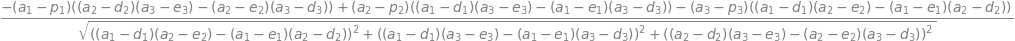

In [22]:
A = spv.reference_frame("A")
p, a, d, e = [sp.symbols(f"{ch}_{{1:4}}", real=True) for ch in "pade"]
vec_p, vec_a, vec_d, vec_e = [spv.vector(A, *_) for _ in [p, a, d, e]]

definitions = collections.OrderedDict(
    list(zip(p, (1, 1, 1)))
    + list(zip(a, (2, 1, 2)))
    + list(zip(d, (-1, -1, -1)))
    + list(zip(e, (4, 1, 2)))
)
definitions

In [23]:
vec_b = vec_a - vec_d
vec_c = vec_a - vec_e
vec_n = vec_b.cross(vec_c).simplify()
vec_n_hat = vec_n.normalize().simplify()
d = (vec_p - vec_a).dot(vec_n_hat).simplify()
d

(-(a_{1} - p_{1})*((a_{2} - d_{2})*(a_{3} - e_{3}) - (a_{2} - e_{2})*(a_{3} - d_{3})) + (a_{2} - p_{2})*((a_{1} - d_{1})*(a_{3} - e_{3}) - (a_{1} - e_{1})*(a_{3} - d_{3})) - (a_{3} - p_{3})*((a_{1} - d_{1})*(a_{2} - e_{2}) - (a_{1} - e_{1})*(a_{2} - d_{2})))/sqrt(((a_{1} - d_{1})*(a_{2} - e_{2}) - (a_{1} - e_{1})*(a_{2} - d_{2}))**2 + ((a_{1} - d_{1})*(a_{3} - e_{3}) - (a_{1} - e_{1})*(a_{3} - d_{3}))**2 + ((a_{2} - d_{2})*(a_{3} - e_{3}) - (a_{2} - e_{2})*(a_{3} - d_{3}))**2)

In [24]:
d.subs(definitions)

-2*sqrt(13)/13

## Intersection of a line with a plane

A line is given by $\vec r = \vec a + \lambda \vec b$ 
where $\vec a = \hat \imath + 2 \hat \jmath + 3* \hat k$
and $\vec b = 4 \hat i + 5 \hat \jmath + 6 \hat k$. Find the coordinates
of the point at which the line intersects the plane $2 x + y + 3 z = 6$.

In [25]:
A = ssu.reference_frame("A")
a, b, n = [sp.symbols(f"{ch}_{{1:4}}", real=True) for ch in "abn"]
d, lamda = sp.symbols("d lambda", real=True)

vec_a, vec_b, vec_n = [ssu.vector(A, *_) for _ in [a, b, n]]

definitions = collections.OrderedDict(
    list(zip(a, (1, 2, 3)))
    + list(zip(b, (4, 5, 6)))
    + list(zip(n, (2, 1, 3)))
    + [(d, 6)]
)

In [26]:
A = spv.reference_frame("A")
a, b, n = [sp.symbols(f"{ch}_{{1:4}}", real=True) for ch in "abn"]
d, lamda = sp.symbols("d lambda", real=True)

vec_a, vec_b, vec_n = [spv.vector(A, *_) for _ in [a, b, n]]

definitions = collections.OrderedDict(
    list(zip(a, (1, 2, 3)))
    + list(zip(b, (4, 5, 6)))
    + list(zip(n, (2, 1, 3)))
    + [(d, 6)]
)
line_r = vec_a + lamda * vec_b
line_r

(a_{1} + b_{1}⋅λ) a_x + (a_{2} + b_{2}⋅λ) a_y + (a_{3} + b_{3}⋅λ) a_z

## Triangle Midpoint Theorem

Using vectors, prove that the line segment joining the midpoints of two sides of a triangle is parallel to the third side and half its length.

![](./images/Triangle-Midpoint-Theorem.jpg)

In [68]:
N = CoordSys3D('N')
A = N.origin
b, c = sv.create_3d_components('b', 'c')
B = A.locate_new('B', sv.vector(N, *b))
C = A.locate_new('C', sv.vector(N, *c))
E = A.locate_new("E", C.position_wrt(A)/2)
D = A.locate_new("D", B.position_wrt(A) + C.position_wrt(B)/2)
vec_ED = D.position_wrt(E)
vec_AB = B.position_wrt(A)

assert 2*vec_ED.magnitude().simplify() == vec_AB.magnitude()
assert vec_ED.normalize().dot(vec_AB.normalize()).simplify() == 1   # Parallel

# Vector Calculus

In [27]:
F = spv.reference_frame("F")
x, y, z = sp.symbols("x, y, z", real=True)

## Space Curves

### Arc Length


\begin{align*}
    \mathbf r(u) &= x(u) \mathbf{i}  + y(u) \mathbf{j} + z(u) \mathbf k \\
    s &= \int_{u_i}^{u_f} 
        \sqrt{\frac{d \mathbf r }{du} \cdot \frac{d \mathbf r }{du}} du
\end{align*}

### Tangents

\begin{align*}
    \frac{d \mathbf r} {d s} \textrm{ is a unit tangent to } 
        \mathbf r(s) \textrm{, define } 
            \hat {\mathbf t} &\equiv \frac{d \mathbf r} {d s} \\
    \textrm{curvature \( \kappa \) defined as } 
        \kappa &\equiv \left |  \frac{d \hat{\mathbf t}}{d s} \right | \\
    \textrm{radius of curvature \( \rho \) defined as } \rho &\equiv \frac{1}{k} \\
\end{align*}


In terms of mechanics

\begin{align*} 
     \mathbf e_t &= \frac{{}^\mathcal{A} \mathbf v}
         {\Vert {}^\mathcal{A} \mathbf v\Vert}
         & &\textrm{tangent vector relative to $\mathcal A$} \\
     \mathbf e_n &\equiv 
         \frac{{}^\mathcal{A} d \mathbf e_t / d t}
         {\Vert {}^\mathcal{A} d \mathbf e_t / d t \Vert
         } & &\textrm{principal unit normal}                                            \\
     \mathbf e_b &= \mathbf e_t \times \mathbf e_n & &\textrm{principal unit bi-normal} \\   
     \kappa &= \frac{1} { {}^\mathcal{A} v} 
           \left \Vert {}^\mathcal{A}  \frac{d \mathbf e_t}
           {dt}  \right \Vert  
            = \left \Vert {}^\mathcal A \frac{d \mathbf e_t}{d s}  \right \Vert
            & &\textrm{curvature }                                         \\
      \tau &= \frac{1} { {}^\mathcal{A} v} 
           \left \Vert {}^\mathcal{A}  \frac{d \mathbf e_b} {dt}  \right \Vert
           =  \left \Vert {}^\mathcal A \frac{d \mathbf e_b}{d s}   \right \Vert  
           & &\textrm{torsion}                        \\
   {}^\mathcal A \mathbf v &= {}^\mathcal A v \mathbf e_t                               \\
   {}^\mathcal A \mathbf a &= \frac{d}{dt} \left ( {}^\mathcal A v \right ) \mathbf e_t +
       \kappa \left ( {}^\mathcal A v \right )^2 \mathbf e_n                                         \\  
   {}^\mathcal A \mathbf \omega {}^\mathcal B &= {}^\mathcal A v \left ( 
       \tau \mathbf e_t  + \kappa \mathbf e_b \right )                                  \\ \\
\end{align*}

### Normals

\begin{align*}
    \hat {\mathbf t} &\perp \frac{\hat {d \mathbf t}} {d s} \\
    \hat {\mathbf n} \textrm{ defined as unit vector perpendicular }  
        \hat {\mathbf t} \\
    \hat {\mathbf n} \textrm{ is called the principal normal and } 
    \frac{ {d \mathbf {\hat t}}} {d s} &= \kappa \hat {\mathbf n} \\ 
    \hat {\mathbf b} \textrm{ is called the binormal and } 
         \hat {\mathbf b} &= \hat {\mathbf t} \times \hat {\mathbf n}
\end{align*}
    


# Cone

In [28]:
u = F.z
m = spv.PI / 6
r = spv.vector(F, x, y, z)
r, r.dot(u), r.magnitude() * sp.cos(m)

⎛x f_x + y f_y + z f_z, z,       ______________⎞
⎜                               ╱  2    2    2 ⎟
⎜                          √3⋅╲╱  x  + y  + z  ⎟
⎜                          ────────────────────⎟
⎝                                   2          ⎠

In [29]:
eqn1 = sp.Eq((r.dot(u)) ** 2, (r.magnitude() * sp.cos(m)) ** 2)
eqn1

In [30]:
result_cone = sp.solve(eqn1, [z])
result_cone

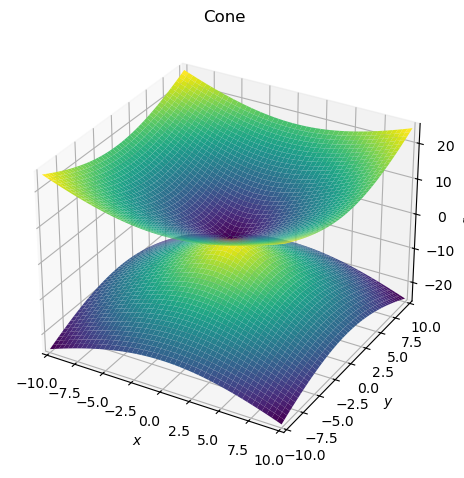

In [31]:
low, high = -10, +10

a = splt.plot3d(
    result_cone[0], (x, low, high), (y, low, high), title="Cone", show=False
)

b = splt.plot3d(result_cone[1], (x, low, high), (y, low, high), show=False)

a.append(b[0])
a.show()

##### Geogebra Cone

<iframe src="https://www.geogebra.org/classic/pn8gmkft?embed" width="600" height="500" allowfullscreen style="border: 1px solid #e4e4e4;border-radius: 4px;" frameborder="0"></iframe>

# Differential Equations

## Separation of Variables

\begin{align*}
    (R^2 + r^2) \ddot r + (R g + {\dot r}^2) r &= 0 
        \quad \textrm{Differential equation}\\ \\
    \ddot{r} &= \frac{d \dot r }{d t}\\
             &= \frac{d \dot r }{d r} \frac{d  r }{d t} \\
             &= \frac{d \dot r }{d r} \dot r \\ \\
    (R^2 + r^2) \frac{d \dot r }{d r} \dot r  &= -(R g + {\dot r}^2) r \\
    (R^2 + r^2) \dot r d \dot r &= -(R g + {\dot r}^2) r d  r \\
    \frac{\dot r}{-(R g + {\dot r}^2) } d \dot r 
        &= \frac{r}{(R^2 + r^2)} d r \\
    \int_{0}^{v} {\frac{\dot r}{-(R g + {\dot r}^2) }} d \dot r
            &= \int_0^r \frac{r}{(R^2 + r^2)} d r

    
\end{align*}


In [32]:
tau = sp.Symbol("tau")
m, g, R = sp.symbols("m, g, R", real=True, positive=True)
vi, vf, ri, rf = sp.symbols("v_i, v_f, r_i, r_f", real=True, positive=True)

In [33]:
sp.integrate(-tau / (R * g + tau**2), (tau, vi, vf)) * 2

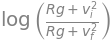

In [34]:
sp.logcombine(sp.integrate(-tau / (R * g + tau**2), (tau, vi, vf)) * 2)

In [35]:
sp.integrate(tau / (R**2 + tau**2), (tau, ri, rf))

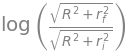

In [36]:
sp.logcombine(sp.integrate(tau / (R**2 + tau**2), (tau, ri, rf)))

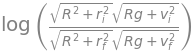

In [37]:
result = sp.logcombine(
    (
        sp.integrate(-tau / (R * g + tau**2), (tau, vi, vf))
        - sp.integrate(tau / (R**2 + tau**2), (tau, ri, rf))
    )
)

result  # = 0

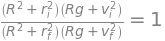

In [38]:
sp.Eq(sp.exp(result) ** 2, 1)

## Partial Differentiation

## Maxima, Minima 2 valued function
$
f_x = 0  \land f_y = 0$ and
1. $f_{xx} > 0 \land f_{yy} > 0 \land f_{xy} ^2 < f_{xx} f_{yy}
\implies \textrm{ Minima}$
1. $f_{xx} < 0 \land f_{yy} < 0 \land f_{xy} ^2 < f_{xx} f_{yy}
\implies \textrm{ Maxima}$
1. $\operatorname{sgn}{f_{xx}} \ne \operatorname{sgn}{f_{yy}}  \lor f_{xy} ^2 > f_{xx} f_{yy}
\implies \textrm{ Saddle Point}
$

If none of the three above criteria are true then the stationary point is not determined and requires further analysis.



In [39]:
plt.style.use("seaborn-v0_8") 
# plt.style.use('fivethirtyeight')

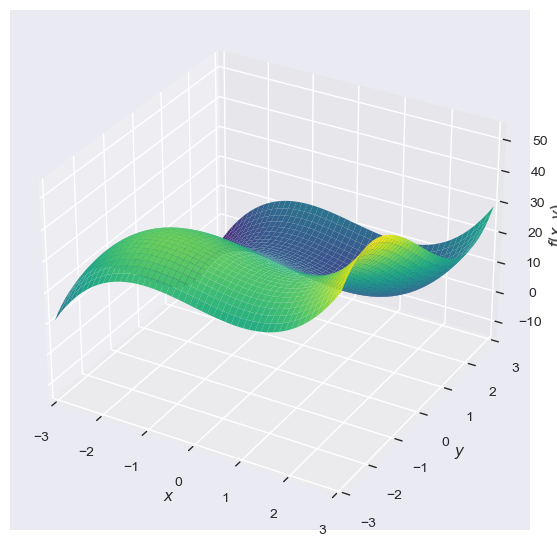

In [40]:
x, y = sp.symbols("x, y", real=True)
f = x**3 + y**3 - 3 * x - 12 * y + 20

a = splt.plot3d(f, (x, -3, +3), (y, -3, +3), show=False)
a.show()

In [41]:
def sgn(x: int) -> int:
    """
    Calculates the sign of an integer.

    This function takes an integer `x` as input and returns its sign as an integer.
    The sign is calculated as follows:
    - If `x` is greater than 0, the function returns 1.
    - If `x` is less than 0, the function returns -1.
    - If `x` is equal to 0, the function returns 0.

    Args:
    x (int): The integer to calculate the sign of.

    Returns:
    int: The sign of the input integer.

    Raises:
    None

    Example:
    >>> sgn(5)
    1
    >>> sgn(-3)
    -1
    >>> sgn(0)
    0
    """
    if x > 0:
        return 1
    return -1 if x < 0 else 0


def extrema(f, x, y, a, b):
    fxx = f.diff(x, x).subs([(x, a), (y, b)])
    fyy = f.diff(y, y).subs([(x, a), (y, b)])
    fxy = f.diff(x, y).subs([(x, a), (y, b)])
    return fxx, fyy, fxy


def Hxy(f, x, y, a, b):
    fxx, fyy, fxy = extrema(f, x, y, a, b)
    return fxy**2 < fxx * fyy


def is_minimum(f, x, y, a, b):
    fxx, fyy, fxy = extrema(f, x, y, a, b)
    return (fxx > 0) and (fyy > 0) and Hxy(f, x, y, a, b)


def is_maximum(f, x, y, a, b):
    fxx, fyy, fxy = extrema(f, x, y, a, b)
    return (fxx < 0) and (fyy < 0) and Hxy(f, x, y, a, b)


def is_saddle_point(f, x, y, a, b):
    fxx, fyy, fxy = extrema(f, x, y, a, b)
    return ((sgn(fxx)) != sgn(fyy)) or (fxy**2 > fxx * fyy)

In [42]:
def print_extrema_results(results):
    for result in results:
        if is_minimum(f, x, y, *result):
            print("minimum", *result)
        elif is_maximum(f, x, y, *result):
            print("maximum", *result)
        elif is_saddle_point(f, x, y, *result):
            print("saddle point", *result)
        else:
            print("Stationary point undetermined kind", *result)

In [43]:
x, y = sp.symbols("x, y")
f = x**3 * sp.exp(-(x**2) - y**2)
fx, fy = f.diff(x), f.diff(y)
results = sp.solve([sp.Eq(fx, 0), sp.Eq(fy, 0)], [x, y])
print_extrema_results(results)

Stationary point undetermined kind 0 y
minimum -sqrt(6)/2 0
maximum sqrt(6)/2 0


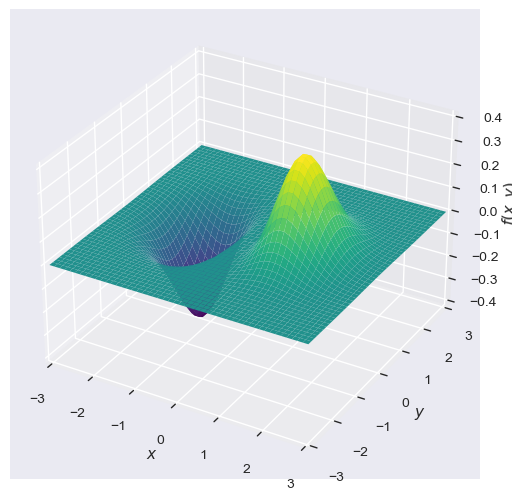

In [44]:
a = splt.plot3d(f, (x, -3, +3), (y, -3, +3), size=(10, 5), show=False)
a.show()

In [45]:
f = sp.exp(-(x**3) / 3 + x - y**2)
fx, fy = f.diff(x), f.diff(y)
results = sp.solve([sp.Eq(fx, 0), sp.Eq(fy, 0)], [x, y])
print_extrema_results(results)

saddle point -1 0
maximum 1 0


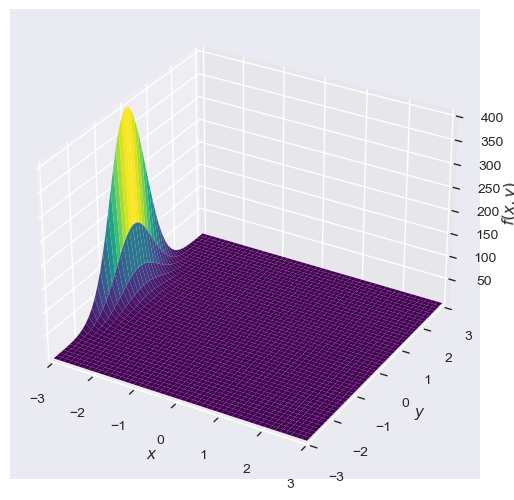

In [46]:
a = splt.plot3d(f, (x, -3, +3), (y, -3, +3), size=(10, 5), show=False)
a.show()

# Einstein Summation Convention

![](./images/Tensor3.png)
![](./images/Tensor4.png)
